In [32]:
import cv2
import matplotlib.pyplot as plt

###阈值分割
img=cv2.imread('E:/dataset/trash/trash99.jpg')
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
ret, mask = cv2.threshold(img,110, 255, cv2.THRESH_BINARY)
mask_inv = cv2.bitwise_not(mask)
img2_fg = cv2.bitwise_and(img, img, mask=mask_inv)
#cv2.imwrite('test.png',img2_fg)


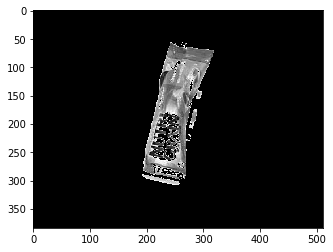

In [34]:
plt.imshow(img2_fg,'gray')

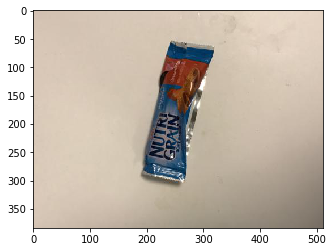

In [36]:
import skimage 
from  skimage import io
from skimage import color
import numpy as np
img=io.imread('trash99.jpg')
#img=color.convert_colorspace(img,'RGB','RGBA')
w,h,c=img.shape
imgnew=np.ones((w,h,c+1),dtype='uint8')*255
plt.imshow(img)

In [37]:
###透明

imgnew[:,:,0:3]=img

imgnew[:,:,3]=200
#imgnew.dtype='uint8'
#imgnew.shape
plt.imshow(imgnew)

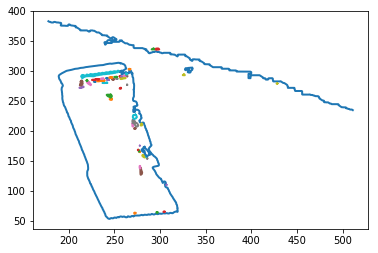

In [41]:
from skimage import measure,draw
from skimage.color import rgb2gray

##取边
imggray=rgb2gray(img)
contours = measure.find_contours(imggray, 0.65)

nshape=np.array(contours)
for n, contour in enumerate(contours):
    plt.plot(contour[:, 1], contour[:, 0], linewidth=2)
plt.show()

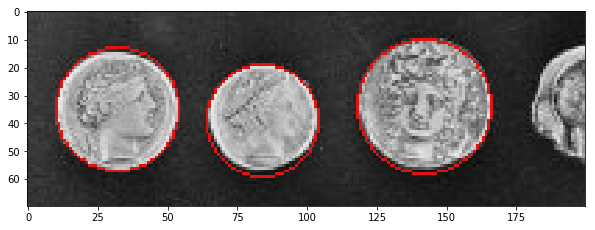

In [43]:
from skimage.feature import canny
from skimage.transform import hough_circle, hough_circle_peaks
from skimage.util import img_as_ubyte
from skimage.draw import circle_perimeter
from skimage  import data

image = img_as_ubyte(data.coins()[160:230, 70:270])
edges = canny(image, sigma=3, low_threshold=10, high_threshold=50)


# Detect two radii
hough_radii = np.arange(20, 35, 2)
hough_res = hough_circle(edges, hough_radii)

# Select the most prominent 3 circles
accums, cx, cy, radii = hough_circle_peaks(hough_res, hough_radii,
                                           total_num_peaks=3)

# Draw them
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10, 4))
image = color.gray2rgb(image)
for center_y, center_x, radius in zip(cy, cx, radii):
    circy, circx = circle_perimeter(center_y, center_x, radius,
                                    shape=image.shape)
    image[circy, circx] = (220, 20, 20)

ax.imshow(image, cmap=plt.cm.gray)
plt.show()

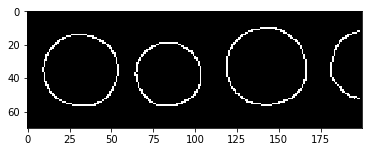

In [44]:
plt.imshow(edges,'gray') 

In [10]:
from skimage  import data
img_rgba = data.logo()

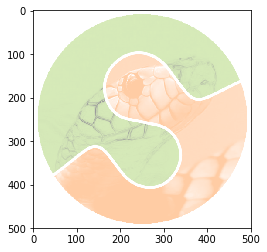

In [11]:
img_rgba[:,:,3]=100
plt.imshow(img_rgba)

In [12]:
import numpy as np
import matplotlib.image as pg
a=pg.imread('E:/dataset/trash/trash99.jpg')
u,v,w=a.shpe


AttributeError: 'numpy.ndarray' object has no attribute 'shpe'

In [1]:
import PIL.Image as Image

In [2]:
def transparent_back(img):
    img = img.convert('RGBA')
    L, H = img.size
    color_0 = img.getpixel((10,10))
    for h in range(H):
        for l in range(L):
            dot = (l,h)
            color_1 = img.getpixel(dot)
            if color_1 == color_0:
                color_1 = color_1[:-1] + (0,)
                img.putpixel(dot,color_1)
    return img


In [5]:
img=Image.open('./imge/488.jpg')
img = img.convert('RGBA')
img=transparent_back(img)
img.save('488.png')

In [16]:
type(img)

numpy.ndarray

In [10]:
pimg=io.imread('112.png')

In [18]:
from skimage.color import rgba2rgb
img=rgba2rgb(pimg)

In [19]:
io.imsave('test2.jpg',img)

D:\anconda\envs\myenv\lib\site-packages\skimage\util\dtype.py:141: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


In [11]:
img=io.imread('./imge/488.jpg')


In [29]:
cv2.imread('./imge/488.jpg')
w,h,c=img.shape
for i in range(0,w):
    for j in range(0,h):
        if img[i,j,0]<100 and img[i,j,1]<100  and img[i,j,2]<100:
            img[i,j,:]=0
            

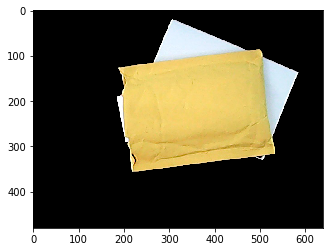

In [30]:
plt.imshow(img)

In [24]:
img1=img.copy()

D:\anconda\envs\myenv\lib\site-packages\skimage\transform\_warps.py:24: UserWarning: The default multichannel argument (None) is deprecated.  Please specify either True or False explicitly.  multichannel will default to False starting with release 0.16.
  warn('The default multichannel argument (None) is deprecated.  Please '
D:\anconda\envs\myenv\lib\site-packages\skimage\transform\_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
D:\anconda\envs\myenv\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


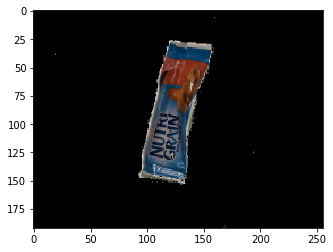

In [70]:
from skimage import transform
dst=transform.rescale(img,0.5)
plt.imshow(dst)

In [71]:
dst1=transform.rescale(img1,0.2)

D:\anconda\envs\myenv\lib\site-packages\skimage\transform\_warps.py:24: UserWarning: The default multichannel argument (None) is deprecated.  Please specify either True or False explicitly.  multichannel will default to False starting with release 0.16.
  warn('The default multichannel argument (None) is deprecated.  Please '
D:\anconda\envs\myenv\lib\site-packages\skimage\transform\_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
D:\anconda\envs\myenv\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


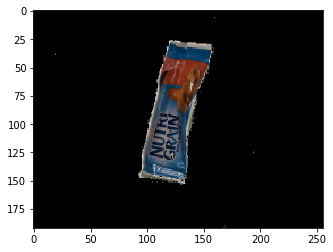

In [72]:
plt.imshow(dst)

In [436]:
w1,h1,c1=dst1.shape
dst3=np.ones(dst.shape)-1
w,h,c=dst3.shape
dst1.shape,dst.shape

((77, 102, 3), (192, 256, 3))

In [437]:
    for  k in range(20):
        r0=np.random.randint(1,120)
        r1=np.random.randint(1,120)
        dst0=transform.rotate(dst1, 30*r0)
        for i in range(1,w1-1):
            for j in range(1,h1-1):
              
                  if r0+i<w and r1+j<h:
          #              if dst3[r+i,r+j,c]<10 and dst3[r+i,r+j,c]>1:
                        if dst0[i,j,0]>0.001 and dst0[i,j,1]>0.001 and dst0[i,j,2]>0.001:
                            for c in [0,1,2]:
                                dst3[r0+i,r1+j,c]=dst0[i,j,c]
                        else:
                            for c in [0,1,2]:
                                dst3[r0+i,r1+j,c]=dst0[i,j,c]+ dst3[r0+i,r1+j,c]

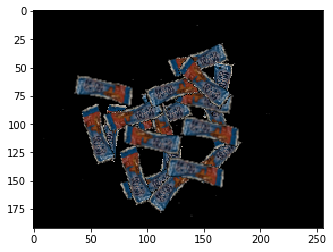

In [438]:
plt.imshow(dst3)

In [213]:
np.random.randint(1,100)

30

In [340]:
imgbg=io.imread('001.jpg')


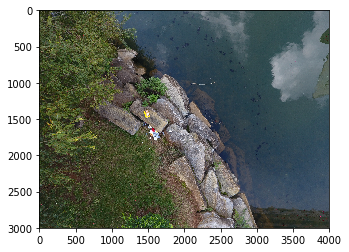

In [341]:
plt.imshow(imgbg[0])

In [342]:
imgbg0=imgbg[0]
imgbg0.shape,dst3.shape

((3000, 4000, 3), (192, 256, 3))

D:\anconda\envs\myenv\lib\site-packages\skimage\transform\_warps.py:24: UserWarning: The default multichannel argument (None) is deprecated.  Please specify either True or False explicitly.  multichannel will default to False starting with release 0.16.
  warn('The default multichannel argument (None) is deprecated.  Please '
D:\anconda\envs\myenv\lib\site-packages\skimage\transform\_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
D:\anconda\envs\myenv\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


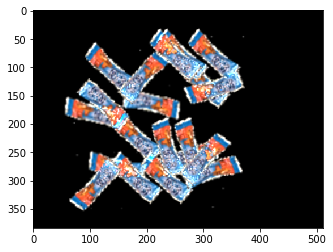

In [418]:
dst4=transform.rescale(dst3,2)
plt.imshow(dst4*2)

In [439]:
w,h,c=dst4.shape
imgbg=io.imread('001.jpg')
imgbg0=imgbg[0]
#imgbg0[0:w,0:h,:]=dst4

In [440]:
r0=1500;r1=1500; 
for i in range(1,w):
    for j in range(1,h):
        if dst4[i,j,0]>0 and dst4[i,j,1]>0 and dst4[i,j,2]>0:
                for c in [0,1,2]:
                    imgbg0[r0+i,r1+j,c]=(dst4[i,j,c]*255)
        else:
                for c in [0,1,2]:
                    imgbg0[r0+i,r1+j,c]=dst4[i,j,c]+ imgbg0[r0+i,r1+j,c]

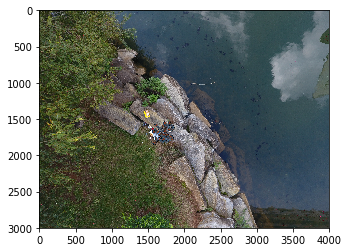

In [441]:
plt.imshow(imgbg0)

In [442]:
io.imsave('test4.jpg',imgbg0)